In [147]:
import numpy as np

In [148]:
gamma = 0.5

def discounted_reward(k, R):
    # k: number of steps
    return gamma**k * R

In [158]:
states = np.arange(5)
print("states =", states)
current_state = np.random.choice(states)

np.set_printoptions(precision=4, suppress=True)

# T[:, i, j] -> Probability that we transition into state j given state i.
T_arr = np.array([
    [   # stay
        [1/2, 1/2, 0, 0, 0],
        [1/4, 1/2, 1/4, 0, 0],
        [0, 1/4, 1/2, 1/4, 0],
        [0, 0, 1/4, 1/2, 1/4],
        [0, 0, 0, 1/2, 1/2]
    ],
    [   # move left
        [1/2, 1/2, 0, 0, 0],
        [1/3, 2/3, 0, 0, 0],
        [0, 1/3, 2/3, 0, 0],
        [0, 0, 1/3, 2/3, 0],
        [0, 0, 0, 1/3, 2/3]
    ],
    [   # move right
        [2/3, 1/3, 0, 0, 0],
        [0, 2/3, 1/3, 0, 0],
        [0, 0, 2/3, 1/3, 0],
        [0, 0, 0, 2/3, 1/3],
        [0, 0, 0, 1/2, 1/2]
    ]
])

test_arr = np.array([0, 0, 0, 0, 0.5]).reshape(1, -1)
print("test_arr.shape =", test_arr.shape)


R_arr = np.zeros_like(T_arr)
R_arr[:, 4, :] = 1
print("R_arr.shape =\n", R_arr.shape)  # (3, 5, 5)
print("R_arr =\n", R_arr)  # (3, 5, 5)
R_arr + test_arr

states = [0 1 2 3 4]
test_arr.shape = (1, 5)
R_arr.shape =
 (3, 5, 5)
R_arr =
 [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]]


array([[[0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [1. , 1. , 1. , 1. , 1.5]],

       [[0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [1. , 1. , 1. , 1. , 1.5]],

       [[0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [0. , 0. , 0. , 0. , 0.5],
        [1. , 1. , 1. , 1. , 1.5]]])

In [152]:
V = np.zeros(T_arr.shape[-1])  # initialize V as zeros column vector
print("V_0.shape =", V.shape)
print(f"V_{0} =\n", V)
gamma = 0.5
for i in range(100):
    print("R_arr + gamma * V =\n", R_arr + gamma * V)
    V = (T_arr * (R_arr + gamma * V)).sum(axis=2).max(axis=0)  # col vector
    print("_"*40)
    print(f"V_{i}.shape =\n", V.shape)
    print(f"V_{i} =\n", V)

V_0.shape = (5,)
V_0 =
 [0. 0. 0. 0. 0.]
R_arr + gamma * V =
 [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]]
________________________________________
V_0.shape =
 (5,)
V_0 =
 [0. 0. 0. 0. 1.]
R_arr + gamma * V =
 [[[0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [1.  1.  1.  1.  1.5]]

 [[0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [1.  1.  1.  1.  1.5]]

 [[0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [0.  0.  0.  0.  0.5]
  [1.  1.  1.  1.  1.5]]]
________________________________________
V_1.shape =
 (5,)
V_1 =
 [0.     0.     0.     0.1667 1.3333]
R_arr + gamma * V =
 [[[0.     0.     0.     0.0833 0.6667]
  [0.     0.  

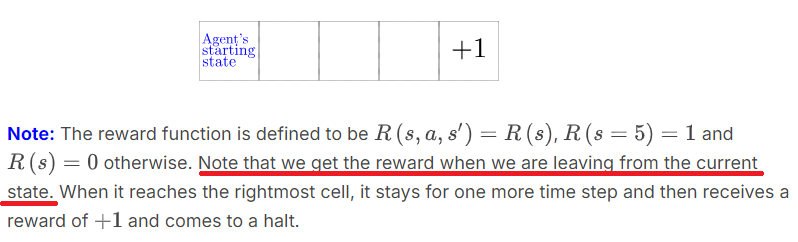

In [151]:
def update_V():
    

SyntaxError: incomplete input (1214330766.py, line 2)